In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [5]:
data = pd.read_csv("./data/compare_history.csv")

data["Address"] = data["Address"].apply(lambda d: d.lower())

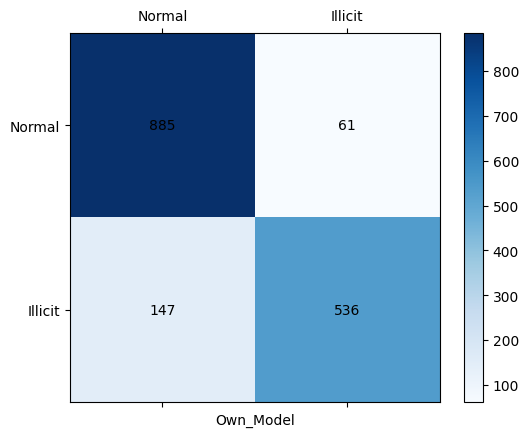

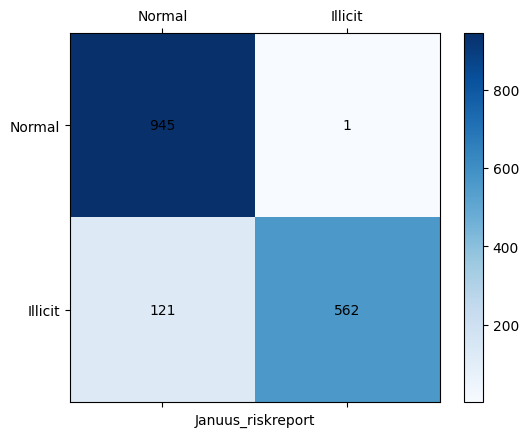

In [6]:
def plot_confusion_matrix(y_true, y_pred, label):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Добавляем надписи для ячеек
    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')

    # Задаем позиции и подписи для делений на осях
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Illicit'])
    ax.set_yticklabels(['Normal', 'Illicit'])

    ax.set_xlabel(label)

    plt.show()


plot_confusion_matrix(data["Is_Real_Fraud"], data["Own_Model"], "Own_Model")
plot_confusion_matrix(data["Is_Real_Fraud"], data["Januus_riskreport"], "Januus_riskreport")

